Empatica Model (LR) Accuracy: 0.5
Samsung Model (LR) Accuracy: 0.941358024691358

Classification Report (Empatica Model LR):
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       486
           1       0.50      1.00      0.67       486

    accuracy                           0.50       972
   macro avg       0.75      0.50      0.33       972
weighted avg       0.75      0.50      0.33       972


Classification Report (Samsung Model LR):
               precision    recall  f1-score   support

           0       1.00      0.88      0.94       486
           1       0.90      1.00      0.94       486

    accuracy                           0.94       972
   macro avg       0.95      0.94      0.94       972
weighted avg       0.95      0.94      0.94       972


Confusion Matrix (Empatica Model LR):
 [[  0 486]
 [  0 486]]

Confusion Matrix (Samsung Model LR):
 [[429  57]
 [  0 486]]


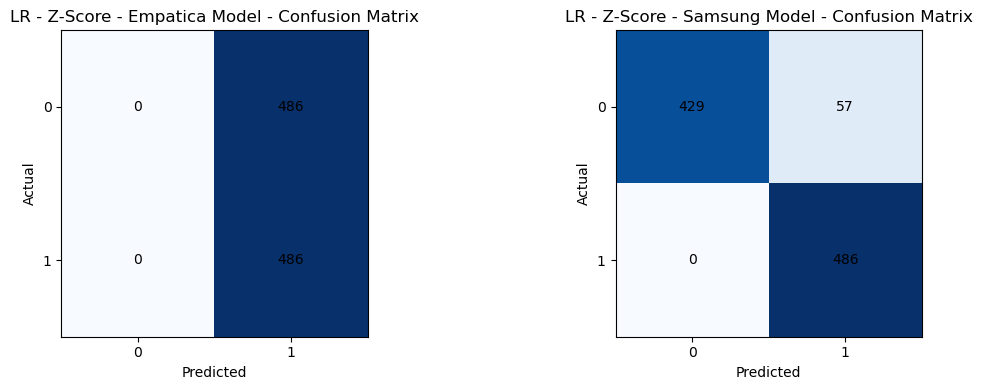

In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define file paths
training_file_path = "./data/6-data-split/z-score/a_training.csv"
testing_file_path = "./data/6-data-split/z-score/b_testing.csv"

# Load the dataset
training_df = pd.read_csv(training_file_path)
testing_df = pd.read_csv(testing_file_path)

# Split the dataset into features (X) and target variable (y)
X_train_empatica = training_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_train_empatica = training_df["CL"]

X_train_samsung = training_df[["samsung_bvp"]]
y_train_samsung = training_df["CL"]

X_test_empatica = testing_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_test_empatica = testing_df["CL"]

X_test_samsung = testing_df[["samsung_bvp"]]
y_test_samsung = testing_df["CL"]

# Define Logistic Regression models
model_empatica_lr = LogisticRegression(random_state=42)
model_samsung_lr = LogisticRegression(random_state=42)

# Train the models
model_empatica_lr.fit(X_train_empatica, y_train_empatica)
model_samsung_lr.fit(X_train_samsung, y_train_samsung)

# Predictions
y_pred_empatica_lr = model_empatica_lr.predict(X_test_empatica)
y_pred_samsung_lr = model_samsung_lr.predict(X_test_samsung)

# Evaluate the models
accuracy_empatica_lr = accuracy_score(y_test_empatica, y_pred_empatica_lr)
accuracy_samsung_lr = accuracy_score(y_test_samsung, y_pred_samsung_lr)

print("Empatica Model (LR) Accuracy:", accuracy_empatica_lr)
print("Samsung Model (LR) Accuracy:", accuracy_samsung_lr)

# Classification report
print(
    "\nClassification Report (Empatica Model LR):\n",
    classification_report(y_test_empatica, y_pred_empatica_lr, zero_division=1),
)
print(
    "\nClassification Report (Samsung Model LR):\n",
    classification_report(y_test_samsung, y_pred_samsung_lr, zero_division=1),
)


# Confusion matrix
conf_mat_empatica_lr = confusion_matrix(y_test_empatica, y_pred_empatica_lr)
conf_mat_samsung_lr = confusion_matrix(y_test_samsung, y_pred_samsung_lr)

print("\nConfusion Matrix (Empatica Model LR):\n", conf_mat_empatica_lr)
print("\nConfusion Matrix (Samsung Model LR):\n", conf_mat_samsung_lr)

# Create a single figure for both confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot confusion matrices
axes[0].imshow(conf_mat_empatica_lr, cmap="Blues")
axes[0].set_title("LR - Z-Score - Empatica Model - Confusion Matrix")
axes[0].set_xticks([0, 1])
axes[0].set_yticks([0, 1])
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
for i in range(conf_mat_empatica_lr.shape[0]):
    for j in range(conf_mat_empatica_lr.shape[1]):
        axes[0].text(
            j,
            i,
            str(int(conf_mat_empatica_lr[i, j])),
            ha="center",
            va="center",
            color="black",
        )

axes[1].imshow(conf_mat_samsung_lr, cmap="Blues")
axes[1].set_title("LR - Z-Score - Samsung Model - Confusion Matrix")
axes[1].set_xticks([0, 1])
axes[1].set_yticks([0, 1])
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
for i in range(conf_mat_samsung_lr.shape[0]):
    for j in range(conf_mat_samsung_lr.shape[1]):
        axes[1].text(
            j,
            i,
            str(int(conf_mat_samsung_lr[i, j])),
            ha="center",
            va="center",
            color="black",
        )
# Show the figure
plt.tight_layout()
plt.show()

Empatica Model (LR) Accuracy: 0.5
Samsung Model (LR) Accuracy: 0.9393004115226338

Classification Report (Empatica Model LR):
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       486
           1       0.50      1.00      0.67       486

    accuracy                           0.50       972
   macro avg       0.75      0.50      0.33       972
weighted avg       0.75      0.50      0.33       972


Classification Report (Samsung Model LR):
               precision    recall  f1-score   support

           0       1.00      0.88      0.94       486
           1       0.89      1.00      0.94       486

    accuracy                           0.94       972
   macro avg       0.95      0.94      0.94       972
weighted avg       0.95      0.94      0.94       972


Confusion Matrix (Empatica Model LR):
 [[  0 486]
 [  0 486]]

Confusion Matrix (Samsung Model LR):
 [[427  59]
 [  0 486]]


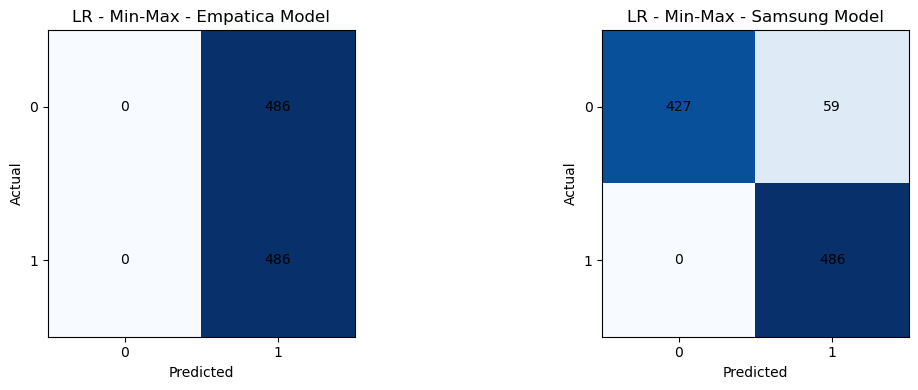

In [6]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define file paths
training_file_path = "./data/6-data-split/min-max/a_training.csv"
testing_file_path = "./data/6-data-split/min-max/b_testing.csv"


# Load the dataset
training_df = pd.read_csv(training_file_path)
testing_df = pd.read_csv(testing_file_path)

# Split the dataset into features (X) and target variable (y)
X_train_empatica = training_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_train_empatica = training_df["CL"]

X_train_samsung = training_df[["samsung_bvp"]]
y_train_samsung = training_df["CL"]

X_test_empatica = testing_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_test_empatica = testing_df["CL"]

X_test_samsung = testing_df[["samsung_bvp"]]
y_test_samsung = testing_df["CL"]

# Define Logistic Regression models
model_empatica_lr = LogisticRegression(random_state=42)
model_samsung_lr = LogisticRegression(random_state=42)

# Train the models
model_empatica_lr.fit(X_train_empatica, y_train_empatica)
model_samsung_lr.fit(X_train_samsung, y_train_samsung)

# Predictions
y_pred_empatica_lr = model_empatica_lr.predict(X_test_empatica)
y_pred_samsung_lr = model_samsung_lr.predict(X_test_samsung)

# Evaluate the models
accuracy_empatica_lr = accuracy_score(y_test_empatica, y_pred_empatica_lr)
accuracy_samsung_lr = accuracy_score(y_test_samsung, y_pred_samsung_lr)

print("Empatica Model (LR) Accuracy:", accuracy_empatica_lr)
print("Samsung Model (LR) Accuracy:", accuracy_samsung_lr)

# Classification report
print(
    "\nClassification Report (Empatica Model LR):\n",
    classification_report(y_test_empatica, y_pred_empatica_lr, zero_division=1),
)
print(
    "\nClassification Report (Samsung Model LR):\n",
    classification_report(y_test_samsung, y_pred_samsung_lr, zero_division=1),
)


# Confusion matrix
conf_mat_empatica_lr = confusion_matrix(y_test_empatica, y_pred_empatica_lr)
conf_mat_samsung_lr = confusion_matrix(y_test_samsung, y_pred_samsung_lr)

print("\nConfusion Matrix (Empatica Model LR):\n", conf_mat_empatica_lr)
print("\nConfusion Matrix (Samsung Model LR):\n", conf_mat_samsung_lr)

# Create a single figure for both confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot confusion matrices
axes[0].imshow(conf_mat_empatica_lr, cmap="Blues")
axes[0].set_title("LR - Min-Max - Empatica Model")
axes[0].set_xticks([0, 1])
axes[0].set_yticks([0, 1])
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
for i in range(conf_mat_empatica_lr.shape[0]):
    for j in range(conf_mat_empatica_lr.shape[1]):
        axes[0].text(
            j,
            i,
            str(int(conf_mat_empatica_lr[i, j])),
            ha="center",
            va="center",
            color="black",
        )

axes[1].imshow(conf_mat_samsung_lr, cmap="Blues")
axes[1].set_title("LR - Min-Max - Samsung Model")
axes[1].set_xticks([0, 1])
axes[1].set_yticks([0, 1])
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
for i in range(conf_mat_samsung_lr.shape[0]):
    for j in range(conf_mat_samsung_lr.shape[1]):
        axes[1].text(
            j,
            i,
            str(int(conf_mat_samsung_lr[i, j])),
            ha="center",
            va="center",
            color="black",
        )
# Show the figure
plt.tight_layout()
plt.show()

## Grid Search

Before training the models, a grid search for tuning the parameters can be employed, to improve the models performance.


Best Parameters (Empatica): {'C': 0.001, 'class_weight': None, 'solver': 'liblinear'}
Best Parameters (Samsung): {'C': 0.1, 'class_weight': None, 'solver': 'sag'}
Empatica Model (LR) Accuracy: 0.5
Samsung Model (LR) Accuracy: 0.941358024691358

Classification Report (Empatica Model LR):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       486
           1       0.50      1.00      0.67       486

    accuracy                           0.50       972
   macro avg       0.25      0.50      0.33       972
weighted avg       0.25      0.50      0.33       972


Classification Report (Samsung Model LR):
               precision    recall  f1-score   support

           0       1.00      0.88      0.94       486
           1       0.90      1.00      0.94       486

    accuracy                           0.94       972
   macro avg       0.95      0.94      0.94       972
weighted avg       0.95      0.94      0.94       972


Confusion Ma

/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


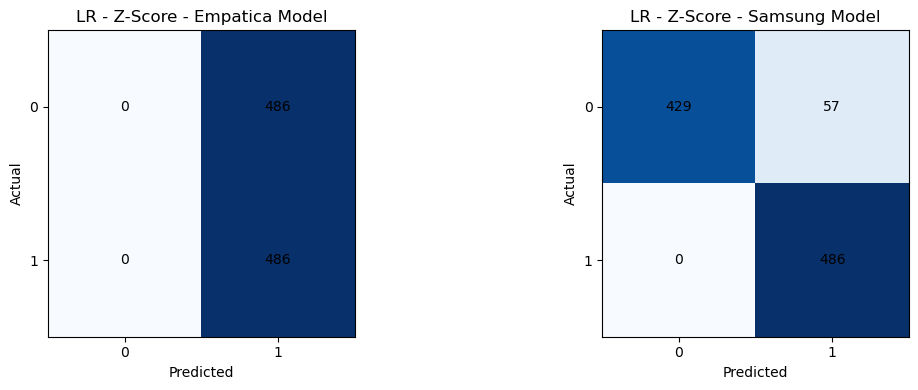

In [7]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Define file paths
training_file_path = "./data/6-data-split/z-score/a_training.csv"
testing_file_path = "./data/6-data-split/z-score/b_testing.csv"

# Load the dataset
training_df = pd.read_csv(training_file_path)
testing_df = pd.read_csv(testing_file_path)

# Split the dataset into features (X) and target variable (y)
X_train_empatica = training_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_train_empatica = training_df["CL"]

X_train_samsung = training_df[["samsung_bvp"]]
y_train_samsung = training_df["CL"]

X_test_empatica = testing_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_test_empatica = testing_df["CL"]

X_test_samsung = testing_df[["samsung_bvp"]]
y_test_samsung = testing_df["CL"]

# Guidance defining parameter grid for grid search provided by ChatGPT
# Specific implementation details were adapted for the purposes of this project.
param_grid_empatica = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    "solver": ["liblinear", "lbfgs", "newton-cg", "sag", "saga"],  # Solver algorithm
    "class_weight": [None, "balanced"],  # Class weight
}

# Guidance defining parameter grid for grid search provided by ChatGPT
# Specific implementation details were adapted for the purposes of this project.
param_grid_samsung = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    "solver": ["liblinear", "lbfgs", "newton-cg", "sag", "saga"],  # Solver algorithm
    "class_weight": [None, "balanced"],  # Class weight
}

# Guidance for Grid Search Parameter Optimization provided by ChatGPT
# Specific implementation details were adapted for the purposes of this project.
grid_search_empatica = GridSearchCV(
    LogisticRegression(random_state=42), param_grid_empatica, cv=5
)
grid_search_empatica.fit(X_train_empatica, y_train_empatica)

# Guidance for Grid Search Parameter Optimization provided by ChatGPT
# Specific implementation details were adapted for the purposes of this project.
grid_search_samsung = GridSearchCV(
    LogisticRegression(random_state=42), param_grid_samsung, cv=5
)
grid_search_samsung.fit(X_train_samsung, y_train_samsung)

# Get the best parameters
best_params_empatica = grid_search_empatica.best_params_
print("Best Parameters (Empatica):", best_params_empatica)

best_params_samsung = grid_search_samsung.best_params_
print("Best Parameters (Samsung):", best_params_samsung)

# Use the best models
best_model_empatica = grid_search_empatica.best_estimator_
best_model_samsung = grid_search_samsung.best_estimator_

# Predictions for Empatica Model
y_pred_empatica_lr = best_model_empatica.predict(X_test_empatica)

# Predictions for Samsung Model
y_pred_samsung_lr = best_model_samsung.predict(X_test_samsung)

# Evaluate the models
accuracy_empatica_lr = accuracy_score(y_test_empatica, y_pred_empatica_lr)
accuracy_samsung_lr = accuracy_score(y_test_samsung, y_pred_samsung_lr)

print("Empatica Model (LR) Accuracy:", accuracy_empatica_lr)
print("Samsung Model (LR) Accuracy:", accuracy_samsung_lr)

# Classification report for Empatica Model
print(
    "\nClassification Report (Empatica Model LR):\n",
    classification_report(y_test_empatica, y_pred_empatica_lr),
)

# Classification report for Samsung Model
print(
    "\nClassification Report (Samsung Model LR):\n",
    classification_report(y_test_samsung, y_pred_samsung_lr),
)

# Confusion matrix for Empatica Model
conf_mat_empatica_lr = confusion_matrix(y_test_empatica, y_pred_empatica_lr)
print("\nConfusion Matrix (Empatica Model LR):\n", conf_mat_empatica_lr)

# Confusion matrix for Samsung Model
conf_mat_samsung_lr = confusion_matrix(y_test_samsung, y_pred_samsung_lr)
print("\nConfusion Matrix (Samsung Model LR):\n", conf_mat_samsung_lr)

# Create a single figure for both confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot confusion matrices
axes[0].imshow(conf_mat_empatica_lr, cmap="Blues")
axes[0].set_title("LR - Z-Score - Empatica Model")
axes[0].set_xticks([0, 1])
axes[0].set_yticks([0, 1])
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
for i in range(conf_mat_empatica_lr.shape[0]):
    for j in range(conf_mat_empatica_lr.shape[1]):
        axes[0].text(
            j,
            i,
            str(int(conf_mat_empatica_lr[i, j])),
            ha="center",
            va="center",
            color="black",
        )

axes[1].imshow(conf_mat_samsung_lr, cmap="Blues")
axes[1].set_title("LR - Z-Score - Samsung Model")
axes[1].set_xticks([0, 1])
axes[1].set_yticks([0, 1])
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
for i in range(conf_mat_samsung_lr.shape[0]):
    for j in range(conf_mat_samsung_lr.shape[1]):
        axes[1].text(
            j,
            i,
            str(int(conf_mat_samsung_lr[i, j])),
            ha="center",
            va="center",
            color="black",
        )
# Show the figure
plt.tight_layout()
plt.show()

Best Parameters (Empatica): {'C': 0.1, 'class_weight': None, 'solver': 'lbfgs'}
Best Parameters (Samsung): {'C': 0.01, 'class_weight': None, 'solver': 'liblinear'}
Empatica Model (LR) Accuracy: 0.5
Samsung Model (LR) Accuracy: 0.9711934156378601

Classification Report (Empatica Model LR):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       486
           1       0.50      1.00      0.67       486

    accuracy                           0.50       972
   macro avg       0.25      0.50      0.33       972
weighted avg       0.25      0.50      0.33       972


Classification Report (Samsung Model LR):
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       486
           1       0.95      1.00      0.97       486

    accuracy                           0.97       972
   macro avg       0.97      0.97      0.97       972
weighted avg       0.97      0.97      0.97       972


Confusion 

/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


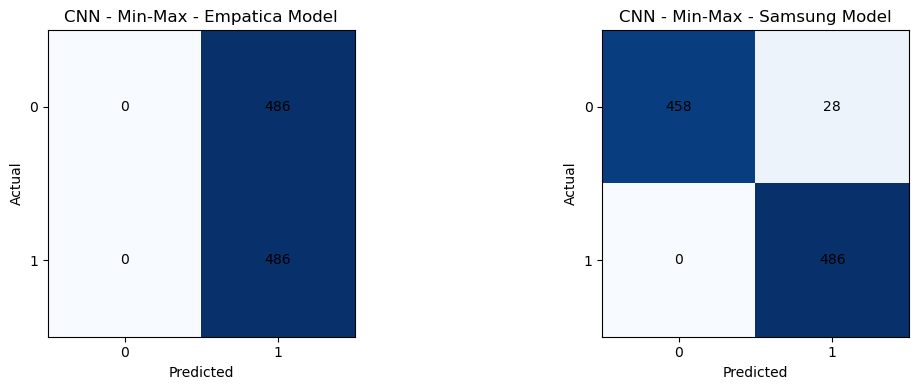

In [8]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Define file paths
training_file_path = "./data/6-data-split/min-max/a_training.csv"
testing_file_path = "./data/6-data-split/min-max/b_testing.csv"

# Load the dataset
training_df = pd.read_csv(training_file_path)
testing_df = pd.read_csv(testing_file_path)

# Split the dataset into features (X) and target variable (y)
X_train_empatica = training_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_train_empatica = training_df["CL"]

X_train_samsung = training_df[["samsung_bvp"]]
y_train_samsung = training_df["CL"]

X_test_empatica = testing_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_test_empatica = testing_df["CL"]

X_test_samsung = testing_df[["samsung_bvp"]]
y_test_samsung = testing_df["CL"]

# Guidance for defining parameter grid for grid search, provided by ChatGPT
# Specific implementation details were adapted for the purposes of this project.
param_grid_empatica = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    "solver": ["liblinear", "lbfgs", "newton-cg", "sag", "saga"],  # Solver algorithm
    "class_weight": [None, "balanced"],  # Class weight
}

param_grid_samsung = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    "solver": ["liblinear", "lbfgs", "newton-cg", "sag", "saga"],  # Solver algorithm
    "class_weight": [None, "balanced"],  # Class weight
}

# Guidance to perform grid search for Empatica Model, provided by ChatGPT
# Specific implementation details were adapted for the purposes of this project.
grid_search_empatica = GridSearchCV(
    LogisticRegression(random_state=42), param_grid_empatica, cv=5
)
grid_search_empatica.fit(X_train_empatica, y_train_empatica)

# Guidance to perform grid search for Samsung Model, provided by ChatGPT
# Specific implementation details were adapted for the purposes of this project.
grid_search_samsung = GridSearchCV(
    LogisticRegression(random_state=42), param_grid_samsung, cv=5
)
grid_search_samsung.fit(X_train_samsung, y_train_samsung)

# Get the best parameters
best_params_empatica = grid_search_empatica.best_params_
print("Best Parameters (Empatica):", best_params_empatica)

best_params_samsung = grid_search_samsung.best_params_
print("Best Parameters (Samsung):", best_params_samsung)

# Use the best models
best_model_empatica = grid_search_empatica.best_estimator_
best_model_samsung = grid_search_samsung.best_estimator_

# Predictions for Empatica Model
y_pred_empatica_lr = best_model_empatica.predict(X_test_empatica)

# Predictions for Samsung Model
y_pred_samsung_lr = best_model_samsung.predict(X_test_samsung)

# Evaluate the models
accuracy_empatica_lr = accuracy_score(y_test_empatica, y_pred_empatica_lr)
accuracy_samsung_lr = accuracy_score(y_test_samsung, y_pred_samsung_lr)

print("Empatica Model (LR) Accuracy:", accuracy_empatica_lr)
print("Samsung Model (LR) Accuracy:", accuracy_samsung_lr)

# Classification report for Empatica Model
print(
    "\nClassification Report (Empatica Model LR):\n",
    classification_report(y_test_empatica, y_pred_empatica_lr),
)

# Classification report for Samsung Model
print(
    "\nClassification Report (Samsung Model LR):\n",
    classification_report(y_test_samsung, y_pred_samsung_lr),
)

# Confusion matrix for Empatica Model
conf_mat_empatica_lr = confusion_matrix(y_test_empatica, y_pred_empatica_lr)
print("\nConfusion Matrix (Empatica Model LR):\n", conf_mat_empatica_lr)

# Confusion matrix for Samsung Model
conf_mat_samsung_lr = confusion_matrix(y_test_samsung, y_pred_samsung_lr)
print("\nConfusion Matrix (Samsung Model LR):\n", conf_mat_samsung_lr)

# Create a single figure for both confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot confusion matrices
axes[0].imshow(conf_mat_empatica_lr, cmap="Blues")
axes[0].set_title("LR - Min-Max - Empatica Model")
axes[0].set_xticks([0, 1])
axes[0].set_yticks([0, 1])
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
for i in range(conf_mat_empatica_lr.shape[0]):
    for j in range(conf_mat_empatica_lr.shape[1]):
        axes[0].text(
            j,
            i,
            str(int(conf_mat_empatica_lr[i, j])),
            ha="center",
            va="center",
            color="black",
        )

axes[1].imshow(conf_mat_samsung_lr, cmap="Blues")
axes[1].set_title("LR - Min-Max - Samsung Model")
axes[1].set_xticks([0, 1])
axes[1].set_yticks([0, 1])
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
for i in range(conf_mat_samsung_lr.shape[0]):
    for j in range(conf_mat_samsung_lr.shape[1]):
        axes[1].text(
            j,
            i,
            str(int(conf_mat_samsung_lr[i, j])),
            ha="center",
            va="center",
            color="black",
        )
# Show the figure
plt.tight_layout()
plt.show()